<a href="https://colab.research.google.com/github/srimoyee6969/ATS--system/blob/main/Copy_of_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import math
from google.colab import files
import yfinance as yf


In [ ]:
stock_ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2023-12-31'

df = yf.download(stock_ticker, start=start_date, end=end_date)

print("Downloaded stock data:")
print(df.head())


[*********************100%***********************]  1 of 1 completed

Downloaded stock data:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.373953  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.687304  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.689531  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.021706  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  24.944685  237458000


In [ ]:
df2 = df.reset_index()['Close']

In [ ]:
df2[1228: ]

,Close
1228,66.775002
1229,66.572502
1230,65.797501
1231,65.502502
1232,65.445000
...,...
2259,193.600006
2260,193.050003
2261,193.149994
2262,193.580002


In [ ]:
df1 = df.reset_index()['Close']

In [ ]:
df1.shape

(2264,)

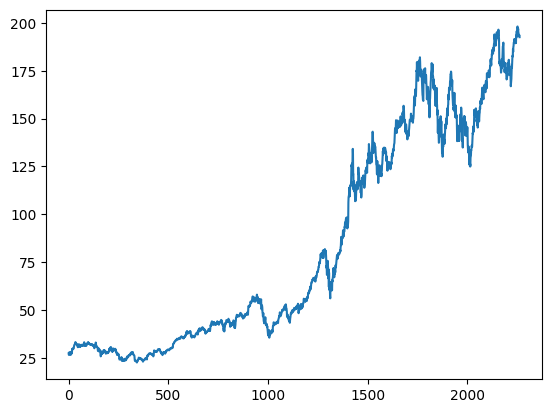

In [ ]:
plt.plot(df1)

In [ ]:
df1


,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500
...,...
2259,193.600006
2260,193.050003
2261,193.149994
2262,193.580002


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.02704744]
 [0.02266059]
 [0.02267484]
 ...
 [0.97174188]
 [0.97419172]
 [0.96820965]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1471, 793)

In [ ]:
train_data

array([[0.02704744],
       [0.02266059],
       [0.02267484],
       ...,
       [0.49152543],
       [0.49101266],
       [0.50052701]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1370, 100)
(1370,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(692, 100)
(692,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - loss: 0.0149 - val_loss: 0.0213
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - loss: 6.9474e-04 - val_loss: 0.0021
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - loss: 3.7359e-04 - val_loss: 0.0047
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step - loss: 3.7440e-04 - val_loss: 0.0025
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 3.6735e-04 - val_loss: 0.0022
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - loss: 3.1135e-04 - val_loss: 0.0026
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - loss: 3.1458e-04 - val_loss: 0.0020
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 3.2493e-04 - val_loss: 0.0023
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 3.3620e-04 - val_loss: 0.0035
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 2.6275e-04 - val_loss: 0.0026
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 2.7865e-04 - val_loss: 0.0019
Epoch 12/50


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

50.4384349252663

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

144.1608779499444

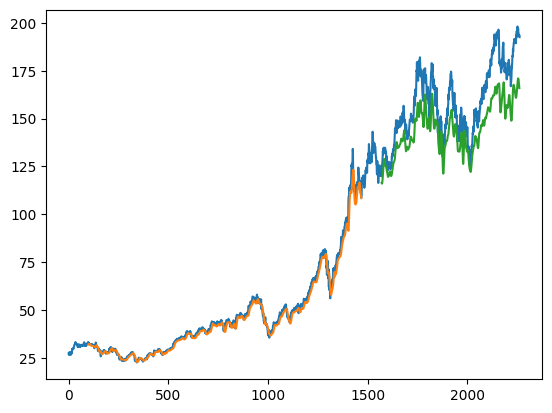

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

793

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 452)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.754906686235703,
 0.7805440596063367,
 0.7864121625565881,
 0.8055547381506192,
 0.813530862025297,
 0.8331292235777912,
 0.8410483198749843,
 0.863039492510197,
 0.86674263389082,
 0.87175619250163,
 0.890898768095661,
 0.8841190932284837,
 0.8661159390644686,
 0.8644067634533033,
 0.887936202831793,
 0.8686796590150754,
 0.8502777464700819,
 0.8520438627264493,
 0.8403645974711487,
 0.8156387960174409,
 0.8265204575785021,
 0.8421307137275158,
 0.8130180484893494,
 0.8117647457689297,
 0.8250391314804268,
 0.8240706189182989,
 0.8194559056207502,
 0.7930778692010789,
 0.7992878768193894,
 0.7646489263667482,
 0.7633385960688439,
 0.8036177130263635,
 0.7694914891773872,
 0.7712576923660373,
 0.7799173647799855,
 0.817177062760718,
 0.7644780174988599,
 0.7673835551852433,
 0.7376441951207258,
 0.7516023032360586,
 0.7059678099319524,
 0.6835208513382769,
 0.7094431017994851,
 0.7004984653626796,
 0.721578153013249,
 0.6736077892716261,
 0.6538385188512437,
 0.65520578979435,
 0.68

In [ ]:
# Demonstrate prediction for the next 30 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30:

    if len(temp_input) > 100:
        x_input = np.array(temp_input[-100:])  # Select the last 100 elements
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))

        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]  # Remove the oldest value

        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])

        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))

        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


0 day input [0.8865119  0.88525851 0.88423297 0.89374737 0.88229595 0.87728248
 0.86264065 0.8654323  0.87312346 0.88104256 0.90320464 0.8762
 0.88890472 0.89790629 0.92029622 0.94040731 0.9416607  0.95071931
 0.95208658 0.91340267 0.88292264 0.88645488 0.89317761 0.87574421
 0.8638371  0.8725538  0.86839478 0.88525851 0.89152546 0.8711295
 0.8622418  0.86714139 0.87449082 0.85101841 0.84230162 0.84378295
 0.84674551 0.86121635 0.8535251  0.86070362 0.86782511 0.88252389
 0.89106968 0.88765133 0.89568439 0.90086886 0.89027207 0.88953141
 0.88058677 0.87312346 0.87095859 0.85625982 0.85694345 0.85945023
 0.84611882 0.82213359 0.82971087 0.84150402 0.84423873 0.86246974
 0.88297967 0.87773818 0.89243695 0.90719275 0.9132887  0.91055407
 0.93328582 0.92417036 0.93921095 0.9424583  0.9521436  0.95202964
 0.96205667 0.95744195 0.96125906 0.95362484 0.9525993  0.9560746
 0.95020649 0.95351088 0.9608603  0.95054831 0.97328015 0.96701328
 0.9781228  0.98632677 0.97191279 0.98062957 0.99914546 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1)

2264

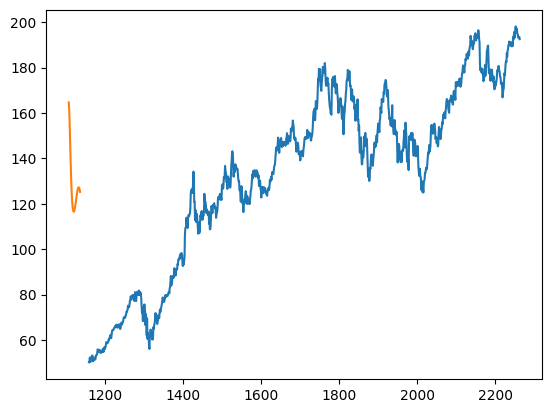

In [ ]:
# Adjust day_new to match the size of df1[1158:]
day_new = np.arange(1158, len(df1))  # Create x-axis points for df1[1158:]

# Now plot the data
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))  # Ensure lengths match
plt.plot(np.arange(len(day_new), len(day_new) + len(lst_output)), scaler.inverse_transform(lst_output))

plt.show()


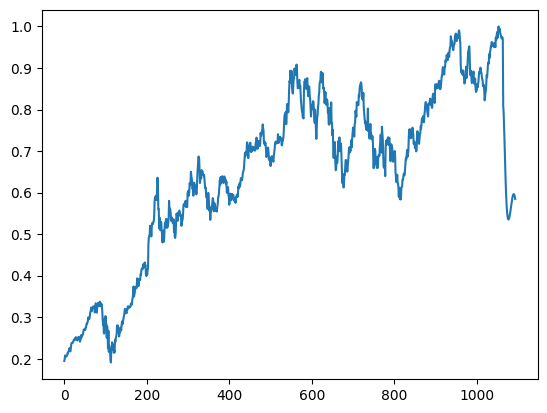

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

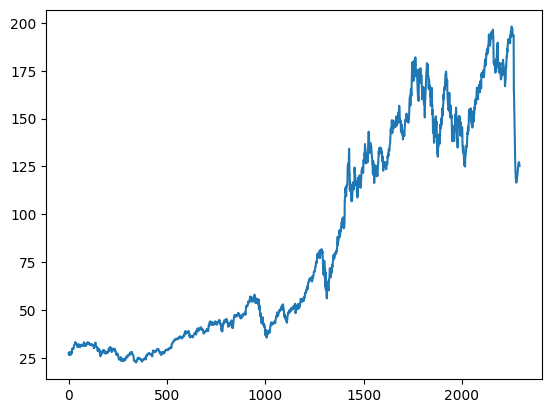

In [ ]:
plt.plot(df3)